In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [125]:
# Loading the Clean Kaggle Dataset 2022
link='https://raw.githubusercontent.com/sran-gurkaran/Pred_Salary_Kaggle_Survey/main/clean_kaggle_data_2022.csv'

df=pd.read_csv(link,encoding='unicode_escape')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [126]:
# Displaying first few rows of the Dataset
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [127]:
# Making a copy of the dataframe to make modifications on the copy and work on it
# While ensuring the original dataframe is unchanged
DF=df.copy(deep=True)

We will treat Multiple Choice Questions and other Questions Separately

For Multiple Choice Questions, We will treat each choice as a separate independent feature.    
If a choice is selected, we will mark it 1
If it is not selected, we will mark it 0

In [128]:
# Separating Original Dataframe into MCQ and Non-MCQ
col_names=(DF.columns)
mcq=col_names.str.contains('_')
DF_MCQ=DF[list(col_names[mcq])]

non_mcq=np.invert(mcq)
DF_Non_MCQ=DF[list(col_names[non_mcq])]

First, cleaning and encoding the dataset for Multiple Choice Questions as below,

In [129]:
DF_MCQ=DF_MCQ.drop(labels=0,axis=0)
DF_MCQ=DF_MCQ.notnull().astype('int')
DF_MCQ=DF_MCQ.drop(labels=['Q29_Encoded','Q29_buckets'],axis=1)
DF_MCQ['Q29_Encoded']=DF['Q29_Encoded'][1:]
DF_MCQ

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded
1,1,0,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,2.0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,10.0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,10.0
4,1,0,1,0,1,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,13.0
5,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,1,1,0,0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,0,0,1,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,10.0
8133,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
8134,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
8135,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,2.0


Cleaning Non Multiple Choice Responses

In [130]:
# Dropping the Column for Duration, as this is redundant
DF_Non_MCQ=DF_Non_MCQ.drop(labels='Duration (in seconds)',axis=1)

In [131]:
# Checking number of Nan Values in the columns
DF_Non_MCQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q2      8137 non-null   object
 1   Q3      8137 non-null   object
 2   Q4      8137 non-null   object
 3   Q5      8137 non-null   object
 4   Q8      8137 non-null   object
 5   Q9      5196 non-null   object
 6   Q11     8137 non-null   object
 7   Q16     7453 non-null   object
 8   Q22     1615 non-null   object
 9   Q23     8137 non-null   object
 10  Q24     8137 non-null   object
 11  Q25     8137 non-null   object
 12  Q26     8137 non-null   object
 13  Q27     8137 non-null   object
 14  Q29     8137 non-null   object
 15  Q30     8087 non-null   object
 16  Q32     1862 non-null   object
 17  Q43     4414 non-null   object
dtypes: object(18)
memory usage: 1.1+ MB


We Will work on Null Values first before encoding

Since, there are too many Nan values in columns Q22, Q32 and Q43
We will remove these columns

Also, the column Q29, which is actually the target variable should NOT be in the predictors, so it will be removed as well.

Q5 has only 1 unique value. We will remove this column as it provides no information

In [132]:
DF_Non_MCQ=DF_Non_MCQ.drop(labels=['Q5','Q22','Q29','Q32','Q43'],axis=1)

In [133]:
# First for Q9 : Have you published any academic research,
# we shall replace Nan in this column with No, as this is likely response in this context
DF_Non_MCQ['Q9'] = DF_Non_MCQ['Q9'].fillna('No')

In [134]:
# For Q16 : For how many years have you used machine learning
# We shall replace Nan values by mode of responses
DF_Non_MCQ['Q16']=DF_Non_MCQ['Q16'].fillna('Under 1 year')

In [135]:
# For Q30 : Money spent for ML / Cloud services at home
# We shall replace Nan values by mode of responses
DF_Non_MCQ['Q30']=DF_Non_MCQ['Q30'].fillna('$0 ($USD)')

In [136]:
DF_Non_MCQ=DF_Non_MCQ.drop(labels=0,axis=0)

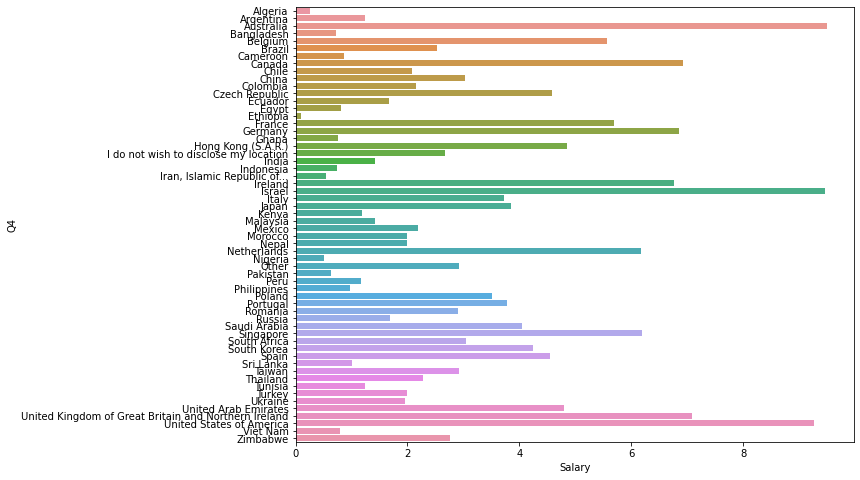

In [137]:
# Let us check if Salary has a significant dependence on Country
A=DF_Non_MCQ.copy(deep=True)
A['Salary']=DF_MCQ['Q29_Encoded'].values
A=A[['Q4','Salary']].groupby('Q4').mean()
A=A.reset_index()
plt.rcParams["figure.figsize"] = [10,8]
sns.barplot(data=A,x='Salary',y='Q4')
plt.show()

In [138]:
#### Please consider this as part of EDA for part 2 ####

It seems there are countries where salaries tend to be higher.     
 So, we will encode countries into Four broad categories

In [139]:
DF_Non_MCQ['Country_Coded']=np.zeros(DF_Non_MCQ.shape[0])
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='United States of America','Country_Coded']=3
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Israel','Country_Coded']=3
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Australia','Country_Coded']=3

DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='United Kingdom of Great Britain and Northern Ireland','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Singapore','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Netherlands','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Ireland','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Germany','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='France','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Canada','Country_Coded']=2
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Belgium','Country_Coded']=2

DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Czech Republic','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Hong Kong (S.A.R.)','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Italy','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Japan','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Poland','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Portugal','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Saudi Arabia','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='Spain','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='South Korea','Country_Coded']=1
DF_Non_MCQ.loc[DF_Non_MCQ['Q4']=='United Arab Emirates','Country_Coded']=1


DF_Non_MCQ=DF_Non_MCQ.drop(labels=['Q4'],axis=1)

Next we need to encode all the categorical values in the Non MCQ Dataframe

In [140]:
col_names=DF_Non_MCQ.columns
for name in col_names:
  DF_Non_MCQ[name]=DF_Non_MCQ[name].astype('category')

DF_Non_MCQ_Coded=DF_Non_MCQ.copy(deep=True)
DF_Non_MCQ_Coded[col_names]=DF_Non_MCQ_Coded[col_names].astype('category').apply(lambda x: x.cat.codes)

# Avoiding 0 as code
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.apply(lambda x: x+1)

In [141]:
# Q2 - Age
# Encoding for Age is okay, as with increasing age group the numeric value is increasing
### NOT TO BE INCLUDED in MCA ###
Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[0:1]]
Ndf['Category']=(DF_Non_MCQ[col_names[0]]).values
Ndf.groupby('Category').max()

,Q2
Category,
18-21,1
22-24,2
25-29,3
30-34,4
35-39,5
40-44,6
45-49,7
50-54,8
55-59,9


In [142]:
# Q3 - Gender
# Gender will be treated as categories and included in MCA,
# thus encoding values for gender will not carry inherent order,
# when we perform mca

In [143]:
#Encoding for country is okay as it is
# It is to be noted here that,this encoding is intentional
# We want some countries such as US or European Contries 
# to have higher inherent value than the rest

### NOT TO BE INCLUDED in MCA ###
Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[12:13]]
Ndf['Category']=(DF_Non_MCQ[col_names[12]]).values
Ndf.groupby('Category').max()

,Country_Coded
Category,
0.0,1
1.0,2
2.0,3
3.0,4


In [144]:
# Encoding for Education has to be changed
# As per the increasing order of level of education
# Otherwise, the numerical values won't align

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[2]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='I prefer not to answer','Q8']=0
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='No formal education past high school','Q8']=1
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='Some college/university study without earning a bachelorEEs degree','Q8']=2
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='BachelorEEs degree','Q8']=3
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='MasterEEs degree','Q8']=4
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='Doctoral degree','Q8']=5
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='Professional doctorate','Q8']=6
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[2:3]]
Ndf['Category']=(DF_Non_MCQ[col_names[2]]).values
Ndf.groupby('Category').max()

,Q8
Category,
BachelorEEs degree,3
Doctoral degree,5
I prefer not to answer,0
MasterEEs degree,4
No formal education past high school,1
Professional doctorate,6
Some college/university study without earning a bachelorEEs degree,2


In [145]:
# Checking encoding for Academic Research,  which looks okay

### NOT TO BE INCLUDED in MCA ###
Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[3:4]]
Ndf['Category']=(DF_Non_MCQ[col_names[3]]).values
Ndf.groupby('Category').max()

,Q9
Category,
No,1
Yes,2


In [146]:
# Encoding for Experience in coding has to be changed
# As per the increasing order of level of experience
# Otherwise, the numerical values won't align

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[4]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='I have never written code','Q11']=0
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='< 1 years','Q11']=1
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='1-3 years','Q11']=2
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='3-5 years','Q11']=3
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='5-10 years','Q11']=4
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='10-20 years','Q11']=5
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='20+ years','Q11']=6
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[4:5]]
Ndf['Category']=(DF_Non_MCQ[col_names[4]]).values
Ndf.groupby('Category').max()

,Q11
Category,
1-3 years,2
10-20 years,5
20+ years,6
3-5 years,3
5-10 years,4
< 1 years,1
I have never written code,0


In [147]:
# Encoding for Experience using ML methods has to be changed
# As per the increasing order of level of experience
# Otherwise, the numerical values won't align

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[5]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='I do not use machine learning methods','Q16']=0
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='Under 1 year','Q16']=1
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='1-2 years','Q16']=2
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='10-20 years','Q16']=7
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[5:6]]
Ndf['Category']=(DF_Non_MCQ[col_names[5]]).values
Ndf.groupby('Category').max()

,Q16
Category,
1-2 years,2
10-20 years,7
2-3 years,3
3-4 years,4
4-5 years,5
5-10 years,6
I do not use machine learning methods,0
Under 1 year,1


In [148]:
# Q23- Current Role
# Encoding for current role can be kept same, as we will included it in MCA

# Q24- Industry
# Encoding for industry can be kept same, as we will include it in MCA

In [149]:
# Encoding for size of company has to be changed
# As per the increasing order of level of experience
# Otherwise, the numerical values won't align

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[8]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='50-249 employees','Q25']=2
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='250-999 employees','Q25']=3
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='1000-9,999 employees','Q25']=4
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='10,000 or more employees','Q25']=5
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[8:9]]
Ndf['Category']=(DF_Non_MCQ[col_names[8]]).values
Ndf.groupby('Category').max()

,Q25
Category,
0-49 employees,1
"10,000 or more employees",5
"1000-9,999 employees",4
250-999 employees,3
50-249 employees,2


In [150]:
# Correcting Encoding for number of persons responsible for data science workloads

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[9]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='0','Q26']=0
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='2-Jan','Q26']=1  # This is actually 1-2 persons
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='4-Mar','Q26']=2  # This is actually 3-4 persons
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='9-May','Q26']=3  # This is actually 5-9 persons
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='14-Oct','Q26']=4  # This is actually 10-14 persons
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='15-19','Q26']=5
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='20+','Q26']=6
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[9:10]]
Ndf['Category']=(DF_Non_MCQ[col_names[9]]).values
Ndf.groupby('Category').max()

,Q26
Category,
0,0
14-Oct,4
15-19,5
2-Jan,1
20+,6
4-Mar,2
9-May,3


In [151]:
# Correcting Encoding for Q27

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[10]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='We use ML methods for generating insights (but do not put working models into production)','Q27']=4
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='We have well established ML methods (i.e., models in production for more than 2 years)','Q27']=6
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[10:11]]
Ndf['Category']=(DF_Non_MCQ[col_names[10]]).values
Ndf.groupby('Category').max()

,Q27
Category,
I do not know,1
No (we do not use ML methods),2
We are exploring ML methods (and may one day put a model into production),3
"We have well established ML methods (i.e., models in production for more than 2 years)",6
"We recently started using ML methods (i.e., models in production for less than 2 years)",5
We use ML methods for generating insights (but do not put working models into production),4


In [152]:
# Correcting Encoding for money spent on services at home

### NOT TO BE INCLUDED in MCA ###
DF_Non_MCQ_Coded['Category']=(DF_Non_MCQ[col_names[11]]).values
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='$100-$999','Q30']=3
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='$1000-$9,999','Q30']=4
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='$10,000-$99,999','Q30']=5
DF_Non_MCQ_Coded.loc[DF_Non_MCQ_Coded['Category']=='$100,000 or more ($USD)','Q30']=6
DF_Non_MCQ_Coded=DF_Non_MCQ_Coded.drop(labels='Category',axis=1)

Ndf=DF_Non_MCQ_Coded.copy(deep=True)
Ndf=Ndf[col_names[11:12]]
Ndf['Category']=(DF_Non_MCQ[col_names[11]]).values
Ndf.groupby('Category').max()

,Q30
Category,
$0 ($USD),1
$1-$99,2
"$10,000-$99,999",5
"$100,000 or more ($USD)",6
$100-$999,3
"$1000-$9,999",4


In [153]:
# Now lets Combine both Data Frames to Prepare Cleaned Dataset
DF_Cleaned=pd.concat([DF_Non_MCQ_Coded, DF_MCQ], axis=1)

In [154]:
# Cleaned and Encoded Dataset is as below
DF_Cleaned

,Q2,Q3,Q8,Q9,Q11,Q16,Q23,Q24,Q25,Q26,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded
1,9,1,2,1,5,2,5,12,1,1,...,1,1,0,0,1,0,0,0,0,2.0
2,4,1,3,1,5,5,12,7,3,6,...,0,0,1,0,1,0,0,0,0,10.0
3,11,1,5,2,6,6,11,6,4,6,...,0,0,0,1,0,0,0,0,0,10.0
4,6,1,5,2,5,6,6,4,4,6,...,0,0,0,1,1,0,0,0,0,13.0
5,6,1,4,2,5,6,5,4,4,2,...,0,0,0,1,1,1,0,0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,6,1,4,1,5,1,3,2,5,6,...,1,0,1,0,1,0,0,0,0,10.0
8133,5,1,4,1,2,2,5,3,5,1,...,0,0,1,0,0,0,0,0,0,0.0
8134,6,1,3,1,2,0,4,4,1,0,...,0,0,1,0,0,0,0,0,0,0.0
8135,3,1,4,2,1,1,7,5,5,0,...,1,0,1,0,0,0,0,0,0,2.0


# **Part 2- Feature Selection**

Feature engineering is a crucial step in the machine learning workflow, and it involves selecting, transforming, and creating features from raw data to build a model that can make accurate predictions or decisions. It is useful because:   
(1) The relevance of a feature used in a machine learning model can significantly impact its prediction performance.       
(2) Feature engineering plays an important part in reducing overfitting, by creating features which captures the essential information in the dataset and filters out the irrelevant features, enabling our model not to fit too much to the noise in the data and hence improve the generalization.    
(3) There are many feature engineering techniques which can help fill in the missing data, or handle missing data, which is a very common scenrio in real world datasets.

Since Feature Selection and Dimensionality Reduction should be independent of the Test Data,      
 we shall split the dataset into training and test set

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_Train, X_Test, y_Train, y_Test = train_test_split(DF_Cleaned.iloc[:,0:290],DF_Cleaned.iloc[:,290], test_size=0.20, random_state=40)

In [157]:
X_Train=X_Train.reset_index()
X_Train=X_Train.drop(labels=['index'],axis=1)

y_Train=y_Train.reset_index()
y_Train=y_Train.drop(labels=['index'],axis=1)

X_Test=X_Test.reset_index()
X_Test=X_Test.drop(labels=['index'],axis=1)

y_Test=y_Test.reset_index()
y_Test=y_Test.drop(labels=['index'],axis=1)

In [158]:
# Now Again Splitting the Training Dataset into MCQ and Non MCQ
DF_Train_Non_MCQ=X_Train.iloc[:,0:13]
DF_Train_MCQ=X_Train.iloc[:,13:]

For dataframe consisting of multiple choice questions, we will perform feature selection using AUC score.     
Every feature has two values 1 or 0. We will divide the dataframe into two subsets corresponding to value 1 or value 0 of the feature.     
This will give us two distributions of salary corresponding to each value of the feature at hand.     
From these two distributions of salary, we shall calculate AUC score which will give an indication of how similar or dissimilar the two distributions are.

In [159]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

In [160]:
def AUC_score(col_name):
  Dist=y_Train
  Y_=DF_Train_MCQ[col_name].values
  gm = GaussianMixture(n_components=1,random_state=0)
  gm.fit((Dist.values).reshape(-1,1))
  p_Train = gm.score_samples((Dist.values).reshape(-1,1))
  return round(roc_auc_score(Y_,-1*p_Train),3)

In [161]:
def plot_dist(col_name):
  data_0=(y_Train[DF_Train_MCQ[col_name]==0]).T.values[0]
  data_1=(y_Train[DF_Train_MCQ[col_name]==1]).T.values[0]
  sns.histplot(data_0, stat="percent", kde=True, color="red", bins=6)
  sns.histplot(data_1, stat="percent", kde=True, color="blue", bins=6)
  plt.legend(['0', '1'],loc='best')
  plt.xlabel('Salary')
  plt.title(col_name)
  auc_score=AUC_score(col_name)
  plt.text(8,40,'AUC Score =' + str(auc_score))
  return auc_score

In [162]:
import matplotlib.gridspec as gridspec

In [163]:
def feature_selector(col_names,threshold,plot_cmnd):
  auc_scores=np.zeros(len(col_names))
  if plot_cmnd=='yes':
    nplots=len(col_names)
    plt.figure(figsize=(18,5*nplots))
    gs = gridspec.GridSpec(nplots,3)
    for i in range(0,nplots):
      fig = plt.subplot(gs[i])
      auc_scores[i]=plot_dist(col_names[i])
  else:
    for i in range(0,len(col_names)):
      auc_scores[i]=AUC_score(col_names[i])
  Sel_Col=np.array(col_names)[auc_scores<threshold]
  return list(Sel_Col)

As an example, we illustrate the technique for Question Q6.    
For others, we will put a threshold on AUC score and filter out the features whose AUC score is below the threshold.

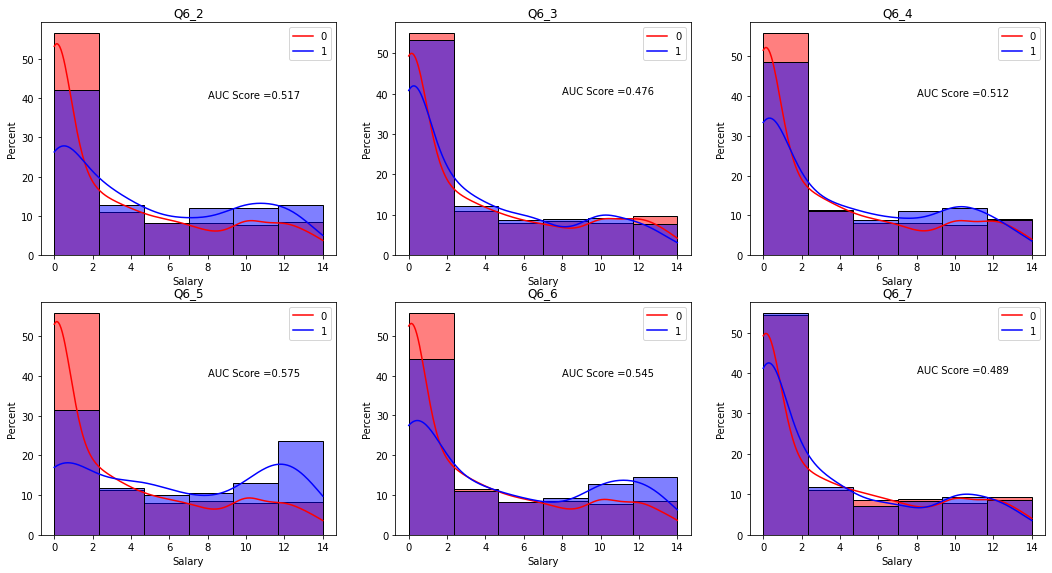

In [164]:
Selected_features=feature_selector(['Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7'],0.516,'yes')

In [165]:
Selected_features

['Q6_3', 'Q6_4', 'Q6_7']

Now using our feature selection function for the entire Multiple Choice Questions Dataframe,

In [166]:
feature_names=list(DF_Train_MCQ.columns)
Selected_features=feature_selector(feature_names,0.516,'no')

In [167]:
print('Number of features given to selector function :'+str(len(feature_names)))
print('Number of features selected :' +str(len(Selected_features)))

Number of features given to selector function :277
Number of features selected :126


In [168]:
DF_Train_MCQ_Selected=DF_Train_MCQ[Selected_features]

In [169]:
# Preparing list of Features on which MCA has to be performed and not to be performed
Feat_Not_MCA=['Q2','Country_Coded','Q8','Q9','Q11','Q16','Q25','Q26','Q27','Q30']
Feat_MCA=['Q3','Q23','Q24']+list(DF_Train_MCQ_Selected.columns)

In [170]:
DF_Train_Not_MCA=X_Train[Feat_Not_MCA]
DF_Train_MCA=X_Train[Feat_MCA]
DF_Train_MCA=DF_Train_MCA.astype('category')

In [171]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.2/414.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [172]:
from prince import MCA

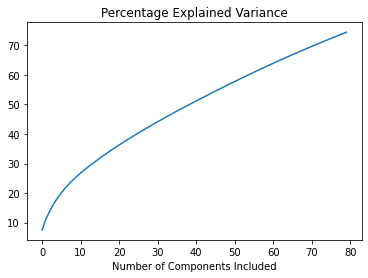

In [173]:
mca_ = MCA(n_components = 80, n_iter = 10, random_state = 0)
mca=mca_.fit(DF_Train_MCA)
DF_Train_MCA_Reduced=mca.row_coordinates(DF_Train_MCA)

a=np.array(mca.cumulative_percentage_of_variance_)
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(a)
plt.xlabel('Number of Components Included')
plt.title('Percentage Explained Variance')
plt.show()

Here we are able to retain only about 75% of the information available in the data when using 80 components.    
But, we will move forward with these 80 features for the MCA part and now will try to find how these features correlate with target variable

In [174]:
# Now Combining the Reduced MCA and Not MCA Data Frames
DF_Train_Reduced=pd.concat([DF_Train_Not_MCA, DF_Train_MCA_Reduced], axis=1)
DF_Train_Reduced.shape

(6508, 90)

In [175]:
from scipy.stats import pearsonr

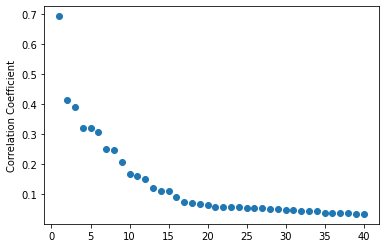

In [176]:
# Finding Correlation with target variable
# and picking features which have higher correlation
corr=np.zeros(DF_Train_Reduced.shape[1])
for i in range(0,len(corr)):
  r,_=pearsonr(DF_Train_Reduced.iloc[:,i].values,y_Train.T.values[0])
  corr[i]=abs(r)
id=list(corr.argsort()[::-1])[0:40]

corr=corr[id]
x=np.arange(1,len(corr)+1,1)
plt.scatter(x,corr)
plt.ylabel('Correlation Coefficient')
plt.show()

In [177]:
cols=DF_Train_Reduced.columns
Picked_cols=cols[id]
Training_Dataset=DF_Train_Reduced[Picked_cols]

In [178]:
Training_Dataset

,Country_Coded,Q11,Q16,Q2,Q27,Q30,7,Q26,5,Q8,...,55,25,12,73,18,74,27,43,32,41
0,4,6,2,10,2,3,-0.144048,0,0.152090,4,...,-0.028702,0.239104,0.187757,0.065423,-0.035198,-0.079388,0.272462,0.073125,0.202966,-0.174976
1,2,4,0,8,2,4,-0.221920,4,0.115219,4,...,-0.152017,0.143190,0.021871,-0.023240,-0.042930,-0.054956,-0.133153,-0.075241,-0.002919,0.062303
2,1,0,1,5,1,2,-0.068068,6,-0.141998,4,...,-0.118254,-0.026498,-0.035628,-0.020698,0.110324,0.031871,0.016639,0.080061,0.061580,0.034358
3,1,1,1,8,3,3,0.326881,2,-0.131451,4,...,0.077162,0.158153,-0.088311,0.054251,0.178267,0.049048,0.070164,0.043927,0.180612,0.165076
4,1,3,2,2,4,2,-0.022253,1,-0.149666,3,...,0.014268,0.132688,0.250543,-0.058448,0.026907,-0.075140,0.046444,0.150690,-0.036543,0.142102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,4,1,1,6,1,1,-0.096733,6,0.015532,4,...,-0.004518,-0.094017,0.091675,0.035407,-0.035484,0.004290,0.010383,0.048659,-0.046863,0.007492
6504,4,3,0,4,1,2,0.052815,0,-0.138601,4,...,0.028545,-0.009531,0.114907,0.009628,-0.094837,0.051053,-0.058885,0.004014,0.181569,-0.120965
6505,1,0,1,3,3,1,0.070411,1,-0.081783,4,...,0.034503,0.036931,-0.033467,0.010752,0.018488,0.118750,0.016329,-0.038343,-0.073581,0.022746
6506,3,6,5,9,2,1,-0.022557,0,-0.001798,5,...,-0.074119,0.110059,-0.173993,0.034323,0.066140,0.017496,0.009889,0.035524,-0.004936,-0.160046


From above plot and order of feature importance,    
Country is most closely related to the survey respondent's yearly compensation,    
followed by experience writing code, followed by number of years using machine learning methods, followed by age,

Now we will need to prepare Test Dataset by applying all the transformations that we applied on the training dataset

In [179]:
# Splitting Test data into MCA and Not MCA
DF_Test_Not_MCA=X_Test[Feat_Not_MCA]
DF_Test_MCA=X_Test[Feat_MCA]
DF_Test_MCA=DF_Test_MCA.astype('category')

# Transforming as per MCA
DF_=DF_Train_MCA.copy(deep=True)
DF_.iloc[0:DF_Test_MCA.shape[0],:]=DF_Test_MCA
DF_Test_MCA_Reduced=mca.row_coordinates(DF_)
DF_Test_MCA_Reduced=DF_Test_MCA_Reduced.iloc[0:DF_Test_MCA.shape[0],:]

# Now Combining the Reduced MCA and Not MCA Data Frames
DF_Test_Reduced=pd.concat([DF_Test_Not_MCA, DF_Test_MCA_Reduced], axis=1)

# Picking the same features after MCA as we did in training set
Test_Dataset=DF_Test_Reduced[Picked_cols]

In [180]:
Test_Dataset

,Country_Coded,Q11,Q16,Q2,Q27,Q30,7,Q26,5,Q8,...,55,25,12,73,18,74,27,43,32,41
0,1,0,1,6,5,3,-0.039501,6,-0.073942,4,...,-0.054033,0.001609,0.002216,-0.002015,-0.024538,-0.023301,-0.012573,0.078545,-0.080080,0.018076
1,1,5,0,7,3,3,-0.037169,2,-0.084094,3,...,-0.028960,0.189075,0.001579,-0.077648,0.074880,0.009467,-0.136756,0.065110,-0.126684,0.011103
2,1,0,1,6,1,3,-0.030998,6,-0.074000,3,...,-0.025159,-0.043526,0.025238,0.031631,-0.019739,0.013625,0.084306,0.014810,-0.002018,-0.035320
3,1,2,2,2,3,1,0.099283,2,0.066720,0,...,0.019281,0.031399,0.097552,-0.064207,0.037285,-0.005812,-0.073739,0.087971,-0.108644,0.033222
4,1,2,1,3,2,2,0.076696,0,-0.146546,4,...,-0.103415,0.134403,0.144718,-0.016533,-0.124032,0.098103,0.008462,0.052726,-0.092758,0.021381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1,6,0,8,2,1,-0.180868,2,0.295778,6,...,0.036425,0.079182,0.054934,-0.083485,-0.026381,0.030271,-0.091063,-0.092058,-0.051518,0.051781
1624,4,0,1,9,2,1,0.025620,5,-0.109245,2,...,0.034171,0.032398,0.028807,-0.049111,-0.038822,0.000536,0.105043,-0.005004,0.093138,-0.066887
1625,1,0,1,5,3,1,0.005840,4,-0.089545,3,...,0.064316,-0.090621,-0.022478,0.071026,0.022495,-0.030026,-0.033841,-0.085109,-0.011785,-0.001579
1626,4,5,6,4,5,6,-0.276098,1,-0.363595,3,...,0.011950,0.006632,-0.205069,-0.125315,-0.067576,-0.004722,-0.011747,0.160622,-0.094187,0.026621


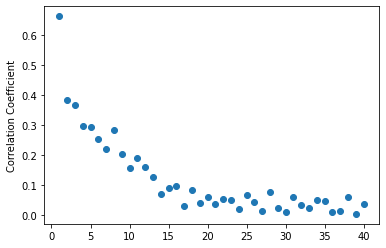

In [181]:
# Checking correlation of Test Data with Test Target Variable
# This is just to verify if we did an okay job with transforming test data
# This is not part of regular flow of work
corr=np.zeros(Test_Dataset.shape[1])
for i in range(0,len(corr)):
  r,_=pearsonr(Test_Dataset.iloc[:,i].values,y_Test.T.values[0])
  corr[i]=abs(r)

x=np.arange(1,len(corr)+1,1)
plt.scatter(x,corr)
plt.ylabel('Correlation Coefficient')
plt.show()

From above plot, we can say that we have done a reasonably effective job as far as feature engineering is concerned,    
because we are getting good correlation on UNSEEN test data,    
as we did not use test data:     
(i) during selection of MCQ features    
(ii) For MCA fitting    
(iii) For picking up reduced dimensionality features using correlation


# **Part 3- Model Implementation**

There are very limited packages in Python that can implement an ordinal logistic regression.    
Although statsmodels has this capability, which can be checked using below link,    
https://www.statsmodels.org/dev/examples/notebooks/generated/ordinal_regression.html     

however, it does not provide the option of regularization or adding penalty.    
Since, we are interested in seeing a Bias- Variance Tradeoff, we need to implement an Ordinal Logistic Regression by coding it ourself.

We will implement an ordinal logistic regression by performing multiple One vs Rest logistic regressions, and by subtracting successive probabilities obtained

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
# Defining Function which will train the OLR model
def OLR_Fit(DF_Train,Targets,penalty_type,reg,solver_='liblinear'):
  log_reg_models=[]
  if str(type(Targets))=="<class 'numpy.ndarray'>":
    m=int(np.max(Targets))
  else:
    Targets=Targets.T.values[0]
    m=int(np.max(Targets))
  for k in range(0,m):
    
    ind_class_1=Targets<=k
    ind_class_2=Targets>k
    Labels=np.zeros(Targets.shape[0])
    Labels[ind_class_1]=0
    Labels[ind_class_2]=1
    lr = LogisticRegression(penalty=penalty_type,C=reg,solver=solver_,max_iter=1000,tol=0.00001).fit(DF_Train.values, Labels)
    log_reg_models.append(lr)
  return log_reg_models

In [184]:
# Defining Function which will give probabilities corresponding to each class 
def OLR_Predict(DF_Test,list_fitted_models):
  Pred=[]
  Prob=[]
  models=list_fitted_models
  for k in range(0,len(models)):
    Pred.append(models[k].predict_proba(DF_Test.values))
    if k==0:
      Prob.append(Pred[0][:,0])
    else:
       # Subtracting Probabilities of (k-1)th regression from kth regression
      Prob.append(Pred[k][:,0]-Pred[k-1][:,0]) 
  Prob.append(Pred[k][:,1])
  return np.array(Prob).T

In [185]:
# Verifying the functions designed, as below,
Logi_Reg_Models=OLR_Fit(Training_Dataset,y_Train,'l2',0.5)
Res=OLR_Predict(Training_Dataset,Logi_Reg_Models)
print('Shape of the output of the model is ' + str(Res.shape))

# Summing the probabilities for each data point
# To verify if they sum to 1
print(np.sum(Res,axis=1))
print(np.sum(Res,axis=1).shape)

Shape of the output of the model is (6508, 15)
[1. 1. 1. ... 1. 1. 1.]
(6508,)


In [186]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [187]:
# Checking model accuracy without any hyperparameter tuning
predictions=np.array([np.argmax(Res[i]) for i in range(0,len(Res))])
a=accuracy_score(y_Train.T.values[0],predictions)*100
print('Accuracy Score with Ordinal Logistic Regression is '+str(a))
# Checking MSE
mse=mean_squared_error(y_Train.T.values[0],predictions)*100
print('MSE with Ordinal Logistic Regression is '+str(mse))

Accuracy Score with Ordinal Logistic Regression is 43.346650276582665
MSE with Ordinal Logistic Regression is 1130.239704978488


In [188]:
# Comparing a Multiclass Logistic Regression Model from Sklearn with
# Ordinal Logistic Model prepared by us for accuracy and MSE
multi_class_lr=LogisticRegression(penalty='l2',C=0.5,solver='liblinear',
          multi_class='ovr',max_iter=1000,tol=0.00001).fit(Training_Dataset.values,y_Train.T.values[0])

pred_multiclass=multi_class_lr.predict(Training_Dataset.values)

a=accuracy_score(y_Train.T.values[0],pred_multiclass)*100
print('Accuracy Score with Multiclass Logistic Regression is '+str(a))
mse=mean_squared_error(y_Train.T.values[0],pred_multiclass)*100
print('MSE with Multiclass Logistic Regression is '+str(mse))

Accuracy Score with Multiclass Logistic Regression is 41.99446834665028
MSE with Multiclass Logistic Regression is 1332.360172095882


It is to be noted here that accuracy is not a suitable metric for this scenerio. This is because predicting 4 or 6 for true value of 5(say), is better than predicting 13 or 14. This closeness to desired target is reflected in MSE but not in accuracy score.   
Because, accuracy score will still be the same for both of the above cases.

In [189]:
from sklearn.base import BaseEstimator
from typing_extensions import Self

In [190]:
# Now preparing an instance for our model
# So that we can use it with sklearn crossvalidate
class OLR(BaseEstimator):
    def __init__(self,penalty_type,reg):
        self.penalty_type = penalty_type
        self.reg= reg
    
    def fit(self, X, y):
        self.list_models=OLR_Fit(X,y,self.penalty_type,self.reg)
        return self
    
    def predict_proba(self, X):
        Prob=OLR_Predict(X,self.list_models)
        return Prob

    def predict(self, X):
        Prob=OLR_Predict(X,self.list_models)
        Pred=np.array([np.argmax(Prob[i]) for i in range(0,len(Prob))])
        return Pred

    def score(self,X,y):
        Prob=OLR_Predict(X,self.list_models)
        predictions=np.array([np.argmax(Prob[i]) for i in range(0,len(Prob))])
        MSE=mean_squared_error(y.T.values[0],predictions)
        return MSE

In [191]:
# Verifying if our model instance works
model=OLR(penalty_type='l2', reg=0.5)
model.fit(Training_Dataset,y_Train)
First=(model.predict_proba(Training_Dataset))[0]
print('Probabilities for 1st data point are \n',First,'\n')
print('Sum of Probabilities for 1st data point is ', np.sum(First))
print('Predicted Class for 1st data point is ',(model.predict(Training_Dataset))[0])
print('MSE on Training Data is ',model.score(Training_Dataset,y_Train))

Probabilities for 1st data point are 
 [ 0.05418972 -0.01449927  0.00857106  0.02004725  0.00598014  0.02284085
  0.05543989  0.09960929  0.1165157   0.04674679  0.1186827   0.1776809
  0.15385598  0.09701617  0.03732281] 

Sum of Probabilities for 1st data point is  1.0
Predicted Class for 1st data point is  11
MSE on Training Data is  11.30239704978488


Please note that, as we discussed before, MSE is more informative than accuracy, therefore we will be comparing MSE across folds rather than accuracy.

In [192]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

Normalizing the data as we are performing regularized regression      
Because large difference in scale between features impacts weights 
which in turn impacts regularization

In [193]:
scaler = MinMaxScaler()
scaler.fit(Training_Dataset.values)
D=scaler.transform(Training_Dataset.values)
Training_Dataset_norm= pd.DataFrame(D, index=Training_Dataset.index, columns=Training_Dataset.columns)
D=scaler.transform(Test_Dataset.values)
Test_Dataset_norm= pd.DataFrame(D, index=Test_Dataset.index, columns=Test_Dataset.columns)

In [212]:
Training_Dataset_norm

,Country_Coded,Q11,Q16,Q2,Q27,Q30,7,Q26,5,Q8,...,55,25,12,73,18,74,27,43,32,41
0,1.000000,1.000000,0.285714,0.9,0.2,0.4,0.256945,0.000000,0.616950,0.666667,...,0.450247,0.716866,0.416436,0.560688,0.433117,0.380327,0.731965,0.569723,0.698186,0.250616
1,0.333333,0.666667,0.000000,0.7,0.2,0.6,0.201205,0.666667,0.586316,0.666667,...,0.305547,0.618336,0.315719,0.459401,0.426720,0.412211,0.375710,0.412773,0.484660,0.410904
2,0.000000,0.000000,0.142857,0.4,0.0,0.2,0.311330,1.000000,0.372609,0.666667,...,0.345165,0.444021,0.280808,0.462305,0.553518,0.525518,0.507273,0.577061,0.551552,0.392027
3,0.000000,0.166667,0.142857,0.7,0.4,0.4,0.594028,0.333333,0.381372,0.666667,...,0.574471,0.633708,0.248822,0.547925,0.609732,0.547935,0.554285,0.538836,0.675001,0.480331
4,0.000000,0.500000,0.285714,0.1,0.6,0.2,0.344124,0.166667,0.366238,0.500000,...,0.500670,0.607548,0.454557,0.419181,0.484501,0.385871,0.533452,0.651775,0.449788,0.464812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,1.000000,0.166667,0.142857,0.5,0.0,0.0,0.290812,1.000000,0.503492,0.666667,...,0.478626,0.374660,0.358100,0.526398,0.432880,0.489526,0.501779,0.543842,0.439085,0.373878
6504,1.000000,0.500000,0.000000,0.3,0.0,0.2,0.397856,0.000000,0.375431,0.666667,...,0.517423,0.461450,0.372205,0.496949,0.383774,0.550551,0.440940,0.496614,0.675994,0.287102
6505,0.000000,0.000000,0.142857,0.2,0.4,0.0,0.410451,0.166667,0.422638,0.666667,...,0.524414,0.509179,0.282120,0.498232,0.477535,0.638895,0.507001,0.451806,0.411376,0.384183
6506,0.666667,1.000000,0.714286,0.8,0.2,0.0,0.343906,0.000000,0.489094,0.833333,...,0.396955,0.584302,0.196800,0.525160,0.516961,0.506760,0.501345,0.529947,0.482568,0.260701


In [382]:
# Changing Hyperparameter for regularization
# and observe MSE across cross validation folds
hp=[0.05,0.1,0.2,0.4,0.8,1.2,1.6,2,2.5,3,3.5,4,5,6]
cv_results_val=[]
cv_results_train=[]
for k in range(0,len(hp)):
  model=OLR(penalty_type='l2', reg=hp[k])
  cv_dict=cross_validate(model, Training_Dataset_norm, y_Train, cv=10,return_train_score=True)
  cv_results_val.append(cv_dict['test_score'])
  cv_results_train.append(cv_dict['train_score'])
cv_results_val=np.array(cv_results_val) 
cv_results_train=np.array(cv_results_train) 

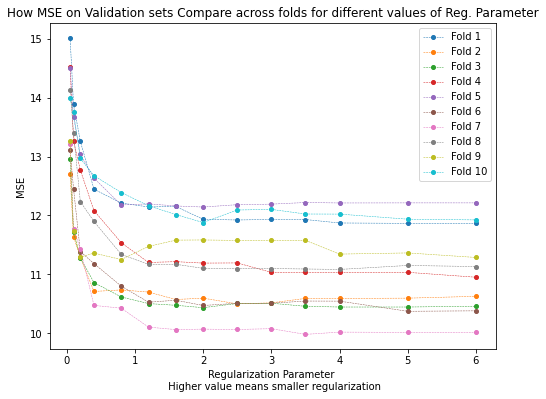

In [383]:
# Visualizing MSE on validation sets across folds
plt.rcParams["figure.figsize"] = [8,6]
for i in range(0,cv_results_val[0].shape[0]):
  plt.plot(hp,cv_results_val.T[i],marker='o',markersize=4,linestyle='dashed', linewidth=0.5,label='Fold '+str(i+1) )
plt.ylabel('MSE')
plt.xlabel('Regularization Parameter \n Higher value means smaller regularization')
plt.title('How MSE on Validation sets Compare across folds for different values of Reg. Parameter')
plt.legend()
plt.show()

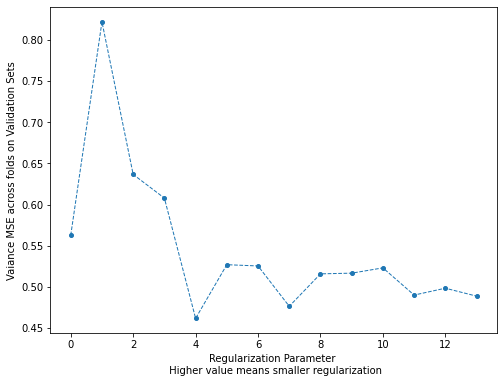

In [384]:
# Visualizing variance of MSE across folds
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(np.var(cv_results_val,axis=1),marker='o',markersize=4,linestyle='dashed', linewidth=1)
plt.ylabel('Vaiance MSE across folds on Validation Sets')
plt.xlabel('Regularization Parameter \n Higher value means smaller regularization')
plt.show()

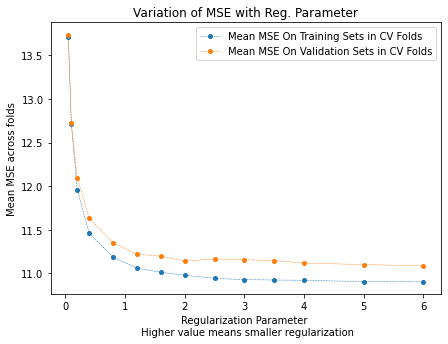

In [385]:
# Visualizing mean MSE across folds for different regularization values
plt.rcParams["figure.figsize"] = [7,5]
mean_mse_val=np.mean(cv_results_val,axis=1)
mean_mse_train=np.mean(cv_results_train,axis=1)
plt.plot(hp,mean_mse_train,marker='o',markersize=4,linestyle='dashed', linewidth=0.5,label='Mean MSE On Training Sets in CV Folds')
plt.plot(hp,mean_mse_val,marker='o',markersize=4,linestyle='dashed', linewidth=0.5,label='Mean MSE On Validation Sets in CV Folds')
plt.ylabel('Mean MSE across folds')
plt.xlabel('Regularization Parameter \n Higher value means smaller regularization')
plt.title('Variation of MSE with Reg. Parameter')
plt.legend()
plt.show()

From above plot, we can say that the model with Regularization Paramter value 6 is performing best.   
This is because, even at such lower regularization, validation error is not increasing. Hence, even at this value, the model is not overfitting

# **Part 4- Model Tuning**

We select penalty type and regularization parameter as two hyperparameters for model tuning, as these are the two hyperparameters in our ordinal regression model construction that have the largest influence on the model performance.

We will employ GridSearchCV in order to evaluate our model at different combinations of these hyperparameters, and to find the model which gives us the best mean MSE score across the cross validation folds

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [197]:
model=OLR(penalty_type=None,reg=None)
param_grid = {'reg': list(hp),  
              'penalty_type': ['l1','l2'] } 
scorer_mse = make_scorer(mean_squared_error,greater_is_better=False)
grid = GridSearchCV(model, param_grid, cv=5,refit=True,scoring=scorer_mse) 
grid.fit(Training_Dataset_norm,y_Train)
print('CV Mean Scores are as below \n',grid.cv_results_['mean_test_score'])
print('\n','Best score is ',grid.best_score_)
print('*** The scores are negative because we have selected "greater_is_better=False" in make_scorer ***','\n')
print('Best Model is as below')
best_model=grid.best_estimator_
best_model

CV Mean Scores are as below 
 [-13.52095552 -12.59620887 -11.91455432 -11.68515853 -11.3913505
 -11.26827951 -11.22681371 -11.23756581 -11.18793732 -11.14522375
 -11.14199641 -11.12601969 -11.12095422 -11.14384575 -13.9240485
 -12.84540404 -12.16085582 -11.66701982 -11.41532485 -11.29376753
 -11.20404604 -11.17731439 -11.18502216 -11.15920909 -11.16827479
 -11.16873869 -11.12878915 -11.12832301]

 Best score is  -11.120954222853506
*** The scores are negative because we have selected "greater_is_better=False" in make_scorer *** 

Best Model is as below


OLR(penalty_type='l1', reg=5)

In order to construct a feature importance graph, we will make predictions with our best model, and then calculate correlation of those predictions with individual features

In [198]:
best_model.fit(Training_Dataset_norm,y_Train)
Pred_Training_Data=best_model.predict(Training_Dataset_norm)

In [199]:
# Finding Correlation with predictions on best model

corr_after=np.zeros(Training_Dataset_norm.shape[1])
for i in range(0,len(corr_after)):
  r,_=pearsonr(Training_Dataset_norm.iloc[:,i].values,Pred_Training_Data)
  corr_after[i]=abs(r)
id=list(corr_after.argsort()[::-1])[0:40]

corr_after=corr_after[id]
x=np.arange(1,len(corr_after)+1,1)

Feature_Imp_Before_Tuning=Picked_cols
cols=Training_Dataset_norm.columns
Feature_Imp_After_Tuning=cols[id]

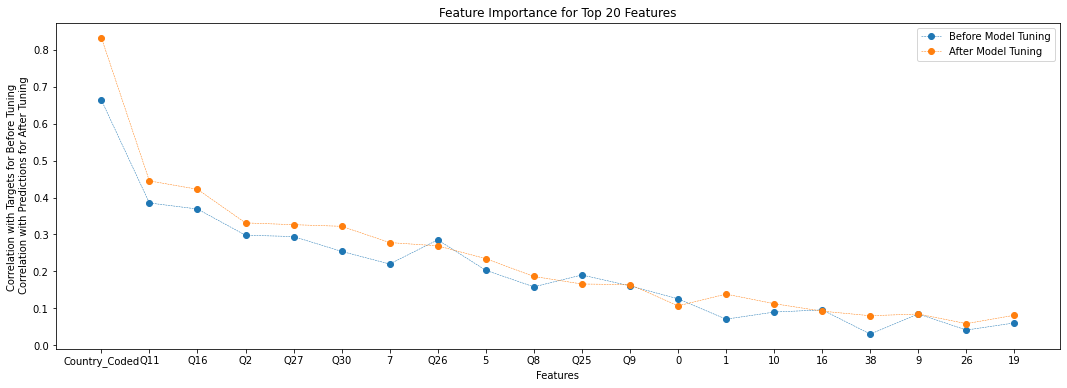

In [200]:
# Comparing the change in Feature Importance
plt.rcParams["figure.figsize"] = [18,6]
data_before=pd.DataFrame(data=corr,columns=['Imp_Before'],index=Feature_Imp_Before_Tuning)
data_after=pd.DataFrame(data=corr_after,columns=['Imp_After'],index=Feature_Imp_After_Tuning)
df_plot=pd.merge(data_before,data_after,left_index=True, right_index=True)
plt.plot(list(df_plot.index)[0:20],df_plot['Imp_Before'][0:20],marker='o',linestyle='dashed', linewidth=0.5,label='Before Model Tuning')
plt.plot(list(df_plot.index)[0:20],df_plot['Imp_After'][0:20],marker='o',linestyle='dashed', linewidth=0.5,label='After Model Tuning')
plt.legend()
plt.title('Feature Importance for Top 20 Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Targets for Before Tuning \n Correlation with Predictions for After Tuning')
plt.show()

# **Part 5- Testing and Discussion**

Although we have selected a best model which is : Penalty_Type - L1, and Regularization Paramter 5, but, let's visualize how our best model compares with different models i.e. with different values of regularization parameter on TEST SET(which is unseen till now) and Training Set


In [202]:
mse_train=[]
mse_test=[]
for i in range(0,len(hp)):
  model=OLR(penalty_type='l1',reg=hp[i]) # Because our best model has L1 penalty
  model.fit(Training_Dataset_norm,y_Train)
  mse_train.append(model.score(Training_Dataset_norm,y_Train))
  mse_test.append(model.score(Test_Dataset_norm,y_Test))

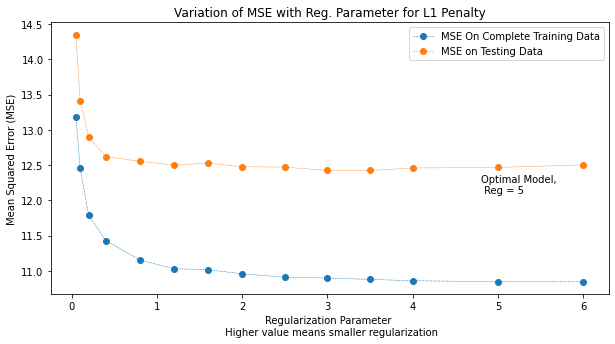

In [208]:
plt.rcParams["figure.figsize"] = [10,5]
plt.plot(hp,mse_train,marker='o',markersize=6,linestyle='dashed', linewidth=0.5,label='MSE On Complete Training Data')
plt.plot(hp,mse_test,marker='o',markersize=6,linestyle='dashed', linewidth=0.5,label='MSE on Testing Data')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Regularization Parameter \n Higher value means smaller regularization')
plt.title('Variation of MSE with Reg. Parameter for L1 Penalty')
plt.text(4.8,12.1,'Optimal Model,\n Reg = 5')
plt.legend()
plt.show()

From above plot, we see that the performance of the optimal model is adequate on the test set as well. Infact, it seems this is an optimal choice for test set as well, because further increase in regularization parameter is slightly increasing the test error and decreasing the training error indicating overfitting.

Next, we will review the classification performance of the optimal model on test set. For this, we will first calculate accuracy metric for reference, and then we will plot distributions of predicted targets and actual targets

In [209]:
# Calculating Accuracy on Test Set
best_model.fit(Training_Dataset_norm,y_Train)
Pred_Training_Data=best_model.predict(Training_Dataset_norm)
Pred_Test_Data=best_model.predict(Test_Dataset_norm)
Acc_Train=accuracy_score(y_Train.T.values[0],Pred_Training_Data)*100
Acc_Test=accuracy_score(y_Test.T.values[0],Pred_Test_Data)*100
print('Accuracy of optimal model on Training Data is {:.3f} %'.format(Acc_Train))
print('Accuracy of optimal model on Test Data is {:.3f} %'.format(Acc_Test))

Accuracy of optimal model on Training Data is 43.685 %
Accuracy of optimal model on Test Data is 42.506 %


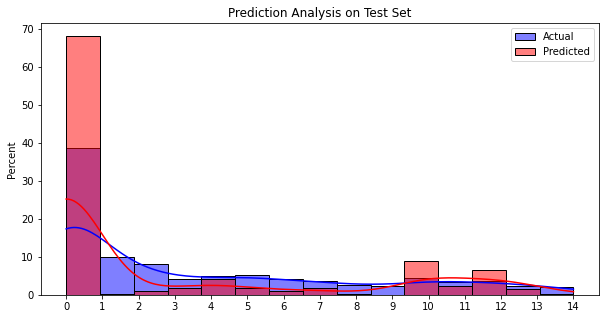

In [210]:
# Plotting distributions of Actual Salary Buckets and Predictions for Test Data
sns.histplot(y_Test.T.values[0], stat="percent", kde=True, color="blue", bins=15,label='Actual')
sns.histplot(Pred_Test_Data, stat="percent", kde=True, color="red", bins=15,label='Predicted')
plt.xticks(np.arange(0,15,1))
plt.title("Prediction Analysis on Test Set")
plt.legend()
plt.show()

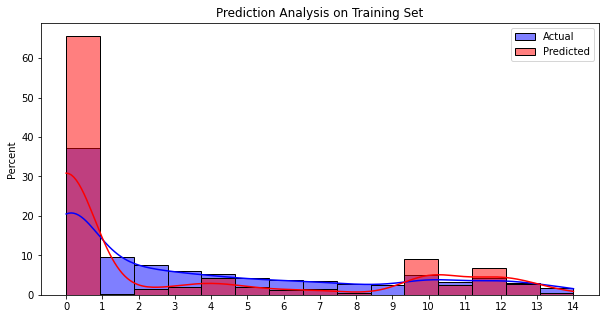

In [211]:
# Plotting distributions of Actual Salary Buckets and Predictions for Training Data
sns.histplot(y_Train.T.values[0], stat="percent", kde=True, color="blue", bins=15,label='Actual')
sns.histplot(Pred_Training_Data, stat="percent", kde=True, color="red", bins=15,label='Predicted')
plt.xticks(np.arange(0,15,1))
plt.title("Prediction Analysis on Training Set")
plt.legend()
plt.show()

From the above two plots of Actual Targets v Predicted Target variables, on Training Set and Test Set, we observe that the prediction performance of the optimal model is very similar for both training and test data. This is an indicator of a good fit, neither overfit nor underfit. Although, the predicted labels or predicted distribution is close to actual labels, but the major difference can be seen for the salary buckets - 0,1 and 2.

Major cause of low accuracy score of the model is predicting salary bucket 0 instead of salary bucket 1 or bucket 2. However, considering the fact that these salary buckets are close to each other, we can confidently say that the model does a satisfactory job in prediciting approximate salary buckets i.e. salary buckets close to the true salary buckets

From this dataset and our classification model,     
We infer that      
(1) The salary distribution is highly skewed. About 40% of the survey respondents belong to salary bucket 0, which is a high fraction.          
(2) Country of current residience has very high influence on the salary range of the respondent.       
(3) Experience writing code or in programming, is the second most significant factor influencing salary, followed by experience using machine learning methods

Finally, we can say that the regression technique implemented in this project, the Ordinal Logistic Regression, has proved to be an effective and reliable technique to perform logistic regression in cases where the target classes have an inherent order such as in this case salary ranges, or the other examples can be grading on tests such as Grade A, B, C etc  or a rating on a feedback form such as poor, average, satisfactory, amazing etc